In [1]:
import os
import pandas as pd
import random
import shutil
import numpy as np

def num_files(data_path):
    df = []
    
    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            df.append((class_name, num_files))

    return pd.DataFrame(df, columns=['Class', 'Num Files'])

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils

def train_participant(df, random_state, cm, print_metrics, print_vol_labels):
    x = df.drop(columns=['volume', 'substance'])
    y = df[['substance', 'volume']]
    
    acc, label_acc = models.train_multioutput_models(x, y, random_state, cm, print_metrics)

    if print_vol_labels:
        volume_labels = np.unique(y['volume'])
        df_volume_labels = pd.DataFrame(volume_labels, columns=['volume'])
        print(df_volume_labels)
        
    return acc, label_acc

In [3]:
exclude = ['oral prep 0', 'apple 20', 'yogurt 20', 'chewing 0', 'grape 5', 'popcorn 1', 'redu oral prep 0', 'carrot 5']

In [4]:
chloe_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\chloe\extracted signals'   
chloe_df, chloe_map = feature_extraction.make_df(chloe_path, exclude)
print(chloe_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [5]:
chloe_acc, chloe_label_acc = train_participant(chloe_df, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_12788\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 95.8333
Per-Label Accuracies: [95.83333333 97.91666667]
----------------------------
KNN
Exact Match Accuracy: 93.7500
Per-Label Accuracies: [95.83333333 97.91666667]
----------------------------
Decision Tree
Exact Match Accuracy: 91.6667
Per-Label Accuracies: [ 91.66666667 100.        ]
----------------------------
Naive Bayes
Exact Match Accuracy: 68.7500
Per-Label Accuracies: [89.58333333 77.08333333]
----------------------------
Logistic Regression
Exact Match Accuracy: 97.9167
Per-Label Accuracies: [ 97.91666667 100.        ]
----------------------------
Gradient Boost
Exact Match Accuracy: 91.6667
Per-Label Accuracies: [91.66666667 97.91666667]
----------------------------
  volume
0      0
1     10
2     20


In [6]:
libing_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\libing\extracted signals'
libing_df, libing_map = feature_extraction.make_df(libing_path, exclude)
print(libing_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [7]:
libing_acc, libing_label_acc = train_participant(libing_df, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_12788\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
KNN
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [50.  87.5]
----------------------------
Decision Tree
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [37.5 87.5]
----------------------------
Naive Bayes
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75.  62.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
Gradient Boost
Exact Match Accuracy: 37.5000
Per-Label Accuracies: [62.5 75. ]
----------------------------
  volume
0      0
1     10
2     20


In [8]:
wenjian_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\wenjian\extracted signals'
wenjian_df, wenjian_map = feature_extraction.make_df(wenjian_path, exclude)
print(wenjian_map)

{'apple': 0, 'dry swallow': 1, 'jelly': 2, 'milk': 3, 'water': 4, 'yogurt': 5}


In [9]:
wenjian_acc, wenjian_label_acc = train_participant(wenjian_df, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_12788\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
KNN
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75. 75.]
----------------------------
Decision Tree
Exact Match Accuracy: 25.0000
Per-Label Accuracies: [62.5 37.5]
----------------------------
Naive Bayes
Exact Match Accuracy: 50.0000
Per-Label Accuracies: [75.  62.5]
----------------------------
Logistic Regression
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75.  87.5]
----------------------------
Gradient Boost
Exact Match Accuracy: 25.0000
Per-Label Accuracies: [50.  62.5]
----------------------------
  volume
0      0
1     10
2     20


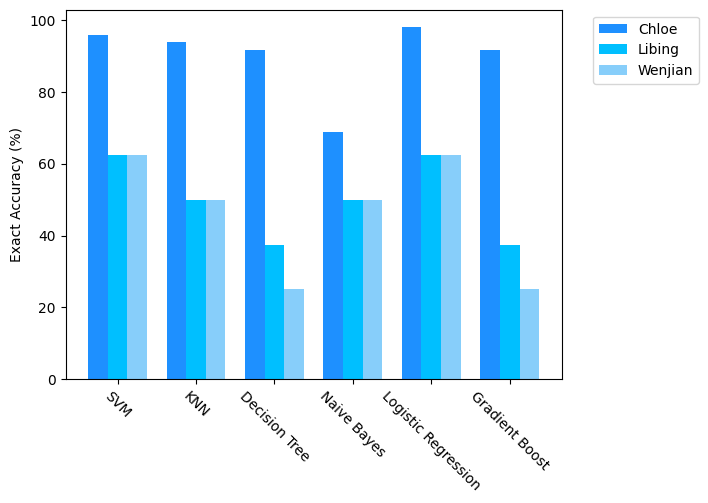

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from src.models import single_models

model_names = [name for name, _ in single_models]

x = np.arange(len(single_models))  # [0, 1, 2]
width = 0.25  # width of each bar

# Plot bars side by side
plt.bar(x - width, chloe_acc, width, label='Chloe', color='dodgerblue')
plt.bar(x, libing_acc, width, label='Libing', color='deepskyblue')
plt.bar(x + width, wenjian_acc, width, label='Wenjian', color='lightskyblue')

# Add labels
plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [11]:
chloe_df_limited = chloe_df.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_12788\1458217129.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  chloe_df_limited = chloe_df.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)
C:\Users\chloe\AppData\Local\Temp\ipykernel_12788\1458217129.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chloe_df_limited = chloe_df.groupby(['substance', 'volume']).apply(lambda x: x.sample(min(len(x), 5))).reset_index(drop=True)


In [12]:
chloe_acc_lim, chloe_label_acc_lim = train_participant(chloe_df_limited, 42, False, True, True)

C:\Users\chloe\AppData\Local\Temp\ipykernel_12788\4163262930.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


SVM
Exact Match Accuracy: 75.0000
Per-Label Accuracies: [ 75. 100.]
----------------------------
KNN
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [ 87.5 100. ]
----------------------------
Decision Tree
Exact Match Accuracy: 100.0000
Per-Label Accuracies: [100. 100.]
----------------------------
Naive Bayes
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [ 87.5 100. ]
----------------------------
Logistic Regression
Exact Match Accuracy: 87.5000
Per-Label Accuracies: [ 87.5 100. ]
----------------------------
Gradient Boost
Exact Match Accuracy: 62.5000
Per-Label Accuracies: [75. 75.]
----------------------------
  volume
0      0
1     10
2     20


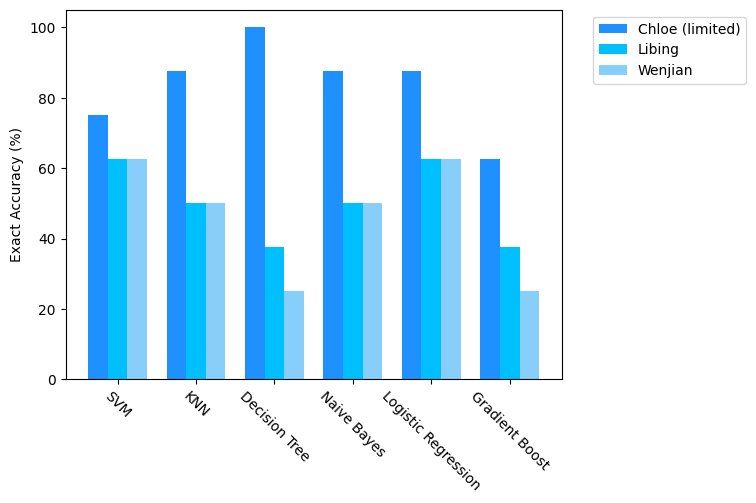

In [13]:
# Plot bars side by side
plt.bar(x - width, chloe_acc_lim, width, label='Chloe (limited)', color='dodgerblue')
plt.bar(x, libing_acc, width, label='Libing', color='deepskyblue')
plt.bar(x + width, wenjian_acc, width, label='Wenjian', color='lightskyblue')

# Add labels
plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()